In [1]:
import uproot
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import ROOT
import glob

sns.set()

Welcome to JupyROOT 6.22/06


In [ ]:

# f = uproot.open('/home/newhouse/public/Analysis/HNL/DHNLAlgorithm/run/8_weight_test/submitDir_noPRW/data-tree/files.root')
event_keys = [
'runNumber',
'eventNumber',
'lumiBlock',
'coreFlags',
'bcid',
'NPV',
'actualInteractionsPerCrossing',
'averageInteractionsPerCrossing',
'weight_pileup',
'correctedAverageMu',
'correctedAndScaledAverageMu',
'correctedActualMu',
'correctedAndScaledActualMu',
'weight',
'passesHnlMuMuFilter',
'passesHnlElMuFilter',
'passesHnlElElFilter',
'passesHnlMuElFilter',
'passesVH4bFilter',
'passL1',
'passHLT',
]

In [2]:
df = uproot.open('/data/newhouse/HNL/DHNL/user.rnewhous.mc16_13TeV.311625.DAOD_SUSY15.e7660_e5984_a875_r11891_r11748_p4357.ntuple_v3p0.v1_tree.root/user.rnewhous.23870347._000001.tree.root')['outTree'].pandas.df(event_keys, flatten=False)
df.head(5)


NameError: name 'event_keys' is not defined

## For MC, every one of these values is the same

In [ ]:
fig = plt.figure(figsize=[10,8])
plt.hist(df.filter(regex='.ActualMu|.AverageMu|.PerCrossing'), bins=np.linspace(0,80,81), histtype='step', linewidth=4, alpha=0.5)
plt.legend(df.filter(regex='.ActualMu|.AverageMu|.PerCrossing').columns)

## For MC, the weight_pileup is filled
Roughly centered around 1, which looks alright


In [ ]:
fig = plt.figure(figsize=[10,8])
plt.hist(df.filter(regex='weight_pileup'), bins=np.linspace(0,5,50), histtype='step', linewidth=4, alpha=0.5)
plt.legend(df.filter(regex='weight_pileup').columns)

## Substantial leftward shift by doing pileup reweighting

In [ ]:
fig = plt.figure(figsize=[10,8])
bin_max = 80
hist_options = {
    'bins' : np.linspace(0,bin_max,bin_max+1),
    'histtype' : 'step',
    'linewidth' : 3,
    # 'density' : True
}

plt.hist(df['averageInteractionsPerCrossing'], 
         **hist_options);
plt.hist(df['averageInteractionsPerCrossing'], 
         weights=df['weight_pileup'],
         **hist_options);
plt.legend([
    'actualInteractionsPerCrossing',
    'actualInteractionsPerCrossing PRW weighted',
])


unweighted mean 38.254704
weighted mean 36.517178


## Here we make some comparisons to get a sense of what each variable means

actualInteractionsPerCrossing MC == averageInteractionsPerCrossing MC

actualInteractionsPerCrossing MC weighted == averageInteractionsPerCrossing MC weighted

actualInteractionsPerCrossing data != averageInteractionsPerCrossing data

Note, this is only a single data file and has a very specific luminosity, to get the full pcture, where there is a better match, all data must be used.

In [ ]:
data_df = uproot.open('/data/hnl/v3_ntuples/data/user.rnewhous.data16_ntuple_v1_tree.root/user.rnewhous.23822250._000147.tree.root')['outTree'].pandas.df(event_keys, flatten=False)


fig = plt.figure(figsize=[10,8])

hist_options = {
    'bins' : np.linspace(0,70,71),
    'histtype' : 'step',
    'linewidth' : 3,
    'density' : True,
    'alpha': 0.5
}

plot_vars = ['actualInteractionsPerCrossing', 'averageInteractionsPerCrossing', 'correctedAndScaledActualMu']
for var in plot_vars:
    plt.hist(data_df[var], label=var+' data',  **hist_options)
    plt.hist(df[var], label=var+' MC', **hist_options)
    plt.hist(df[var], weights=df['weight_pileup'], label=var+' MC weighted', **hist_options)
plt.legend()
plt.title('data18 23447292._000590')


## Now plotting explicitly in ROOT



### MC signal file unweighted

20000.0
Error in <TH1F::Rebin>: Illegal value of ngroup=0


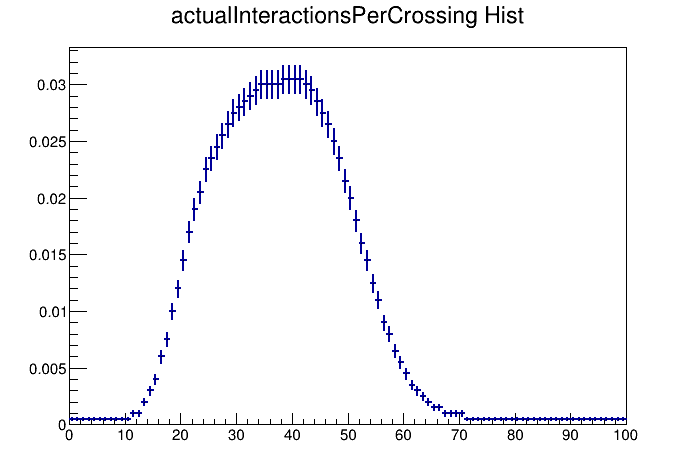

In [8]:
import ROOT

files = [ROOT.TFile('/data/newhouse/HNL/DHNL/user.rnewhous.mc16_13TeV.311625.DAOD_SUSY15.e7660_e5984_a875_r11891_r11748_p4357.ntuple_v3p0.v1_tree.root/user.rnewhous.23870347._000001.tree.root')]

all_files = [] # stupid ROOT needs to be told to not close files
all_files.append(files.copy())

c = ROOT.TCanvas()

h = ROOT.TH1F('actual_mc', 'actualInteractionsPerCrossing Hist', 100,0,100)
outTrees = [f.Get('outTree') for f in files]

# combine all histograms
for t in outTrees:
    htemp = ROOT.TH1F('htemp', 'actualInteractionsPerCrossing Hist', 100,0,100)
    t.Draw('actualInteractionsPerCrossing>>htemp', '', 'goff')
    h.Add(htemp)

print(hhh.Integral())

h.SetLineWidth(2)
h.Scale(1/h.Integral())
h.Rebin(0)
h.Draw('same')
h.Draw('e0 same')
h.SetStats(0)

# h.SetStats(0)
c.Draw()



# h.Draw('')

### MC signal file weighted

21023.938661030494
Warning in <TFile::Append>: Replacing existing TH1: htemp (Potential memory leak).
Error in <TH1F::Rebin>: Illegal value of ngroup=0


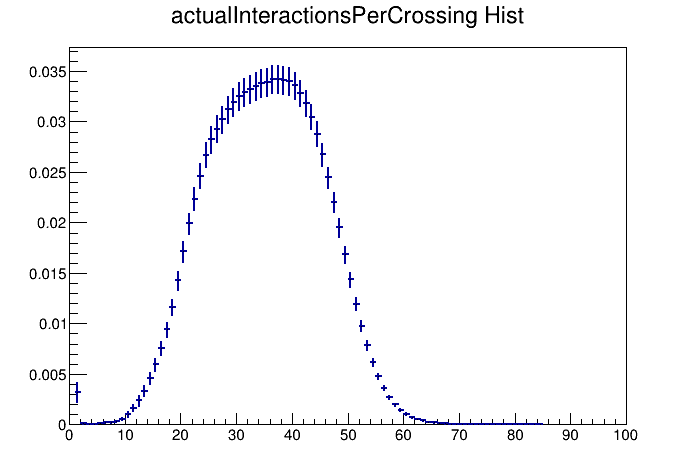

In [9]:
c = ROOT.TCanvas()

hhh = ROOT.TH1F('actual_mc_weighted', 'actualInteractionsPerCrossing Hist', 100,0,100)
outTrees = [f.Get('outTree') for f in files]

# combine all histograms
for ttt in outTrees:
    htemp = ROOT.TH1F('htemp', 'actualInteractionsPerCrossing Hist', 100,0,100)
    ttt.Draw('actualInteractionsPerCrossing>>htemp', 'weight_pileup', 'goff')
    hhh.Add(htemp)

print(hhh.Integral()

hhh.SetLineWidth(2)
hhh.Scale(1/hhh.Integral())
hhh.Rebin(0)
hhh.Draw('same')
hhh.Draw('e0 same')
hhh.SetStats(0)

# h.SetStats(0)
c.Draw()



# h.Draw('')

In [11]:
import ROOT

def draw_note(x, y, text, size=25, font=63):
    l = ROOT.TLatex()
    l.SetNDC()
    l.SetTextColor(1)
    l.SetTextFont(font)
    l.SetTextSize(size)
    l.DrawLatex(x, y, text)

def atlas_label(x, y, text=None):
    draw_note(x, y, r"#bf{#it{ATLAS}} " + text)


### Draw data


Warning in <TCanvas::Constructor>: Deleting canvas with same name: pileup_c


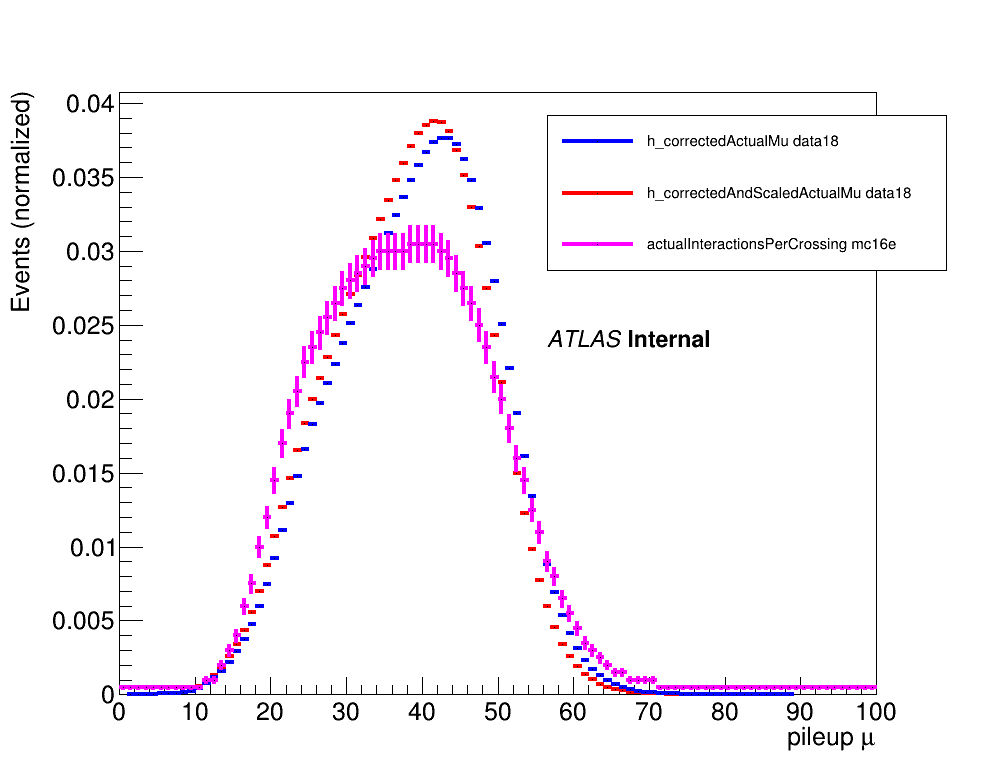

In [13]:

# set up canvas
c = ROOT.TCanvas('pileup_c', 'Pileup', 1000, 800)
c.SetMargin(0.12, 0.12, 0.1, 0.12)

mc_filename = '/data/newhouse/HNL/DHNL/user.rnewhous.mc16_13TeV.311625.DAOD_SUSY15.e7660_e5984_a875_r11891_r11748_p4357.ntuple_v3p0.v1_tree.root/user.rnewhous.23870347._000001.tree.root'
data_filename = '/home/newhouse/public/Analysis/HNL/DHNLAlgorithm/run/8_weight_test/data18_crossings.root'

mc_file = ROOT.TFile(mc_filename)
data_file = ROOT.TFile(data_filename, 'READ')

################ mc weighted ################
h = ROOT.TH1F('actual_mc_weighted', 'actualInteractionsPerCrossing Hist', 100,0,100)
outTree = mc_file.Get('outTree')
outTree.Draw('actualInteractionsPerCrossing>>actual_mc_weighted', 'weight_pileup', 'goff')

h.SetLineWidth(2)
h.Scale(1/h.Integral())
# h.Rebin(0)
h.Draw('same')
h.Draw('e0 same')
h.SetStats(0)
################ mc weighted ################


################ h_correctedAndScaledActualMu ################
# open file and get histogram (already stored)
h_correctedAndScaledActualMu = data_file.Get('h_correctedAndScaledActualMu')
h_correctedAndScaledActualMu.SetTitle('')

# set axis properties
# x
xaxis = h_correctedAndScaledActualMu.GetXaxis()
xaxis.SetRangeUser(0,100)
xaxis.SetTitle('pileup #mu')
# y
yaxis = h_correctedAndScaledActualMu.GetYaxis()
yaxis.SetTitle('Events (normalized)')
# set line properties
h_correctedAndScaledActualMu.Scale(1/h_correctedAndScaledActualMu.Integral())

# This draws data (h_correctedAndScaledActualMu)
h_correctedAndScaledActualMu.Draw('')
h_correctedAndScaledActualMu.Draw('e0 same')
h_correctedAndScaledActualMu.SetLineWidth(4)
h_correctedAndScaledActualMu.SetLineColor(ROOT.kRed)
################ h_correctedAndScaledActualMu ################ end


################ h_correctedActualMu ################
h_correctedActualMu = data_file.Get('h_correctedActualMu')
h_correctedActualMu.SetTitle('')

# set axis properties
# x
xaxis = h_correctedActualMu.GetXaxis()
xaxis.SetRangeUser(0,100)
xaxis.SetTitle('pileup #mu')
# y
yaxis = h_correctedActualMu.GetYaxis()
yaxis.SetTitle('Events (normalized)')
# set line properties
h_correctedActualMu.Scale(1/h_correctedActualMu.Integral())

# This draws data (h_correctedActualMu)
# 
h_correctedActualMu.Draw('same')
h_correctedActualMu.Draw('e0 same')
h_correctedActualMu.SetLineWidth(4)
h_correctedActualMu.SetLineColor(ROOT.kBlue)
################ h_correctedAndScaledActualMu ################ end


#this draws MC from the cell above but weighted with pileup weight (h)
h.Draw('same')
h.Draw('e0 same')
h.SetLineWidth(4)
h.SetLineColor(ROOT.kMagenta)

# legend
x = 0.55
y = 0.65
dy = 0.1
leg = ROOT.TLegend(x, y, x+.4, y+.2)
leg.Draw('SAME')

leg.AddEntry(h_correctedActualMu, "h_correctedActualMu data18")
leg.AddEntry(h_correctedAndScaledActualMu, "h_correctedAndScaledActualMu data18")
# leg.AddEntry(h, "actualInteractionsPerCrossing mc16e ")
leg.AddEntry(h, "actualInteractionsPerCrossing mc16e weight applied")

h_correctedAndScaledActualMu.SetStats(0)
h.SetStats(0)
atlas_label(x,y-dy, 'Internal')


c.Draw()


Warning in <TCanvas::Constructor>: Deleting canvas with same name: pileup_c


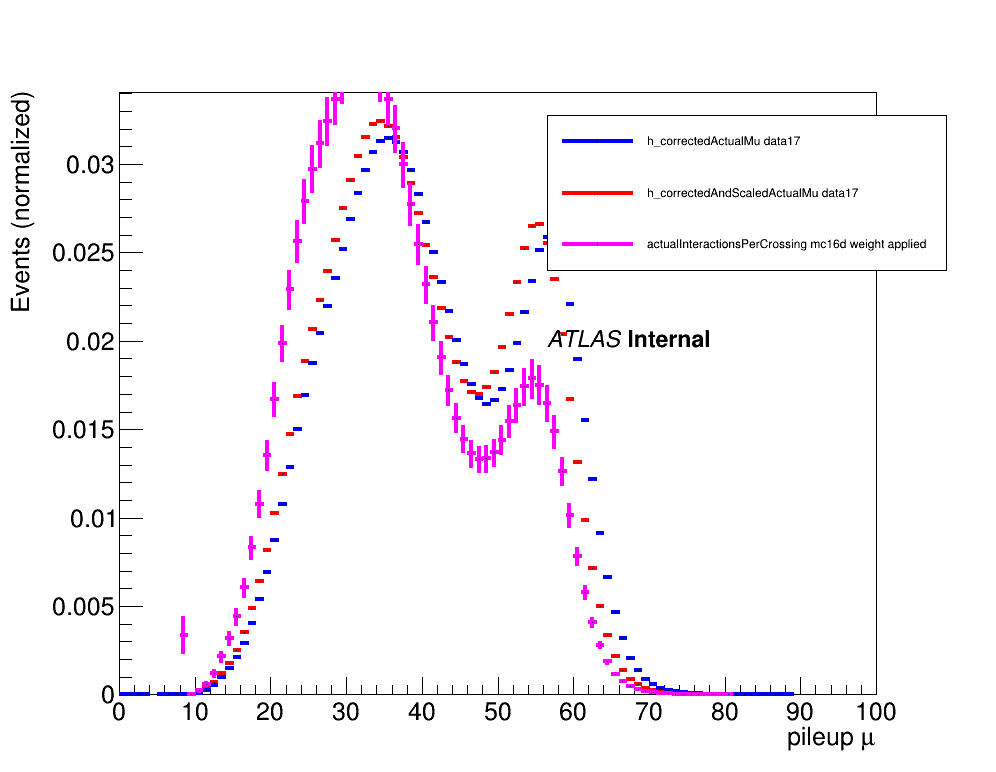

In [12]:

# set up canvas
c = ROOT.TCanvas('pileup_c', 'Pileup', 1000, 800)
c.SetMargin(0.12, 0.12, 0.1, 0.12)

mc_filename = '/data/newhouse/HNL/DHNL/user.rnewhous.mc16_13TeV.312965.DAOD_SUSY15.e7902_e5984_a875_r11916_r11748_p4357.ntuple_v3p0.v1_tree.root/user.rnewhous.23866713._000001.tree.root'
data_filename = '/home/newhouse/public/Analysis/HNL/DHNLAlgorithm/run/8_weight_test/data17_crossings.root'

mc_file = ROOT.TFile(mc_filename)
data_file = ROOT.TFile(data_filename, 'READ')

################ mc weighted ################
h = ROOT.TH1F('actual_mc_weighted', 'actualInteractionsPerCrossing Hist', 100,0,100)
outTree = mc_file.Get('outTree')
outTree.Draw('actualInteractionsPerCrossing>>actual_mc_weighted', 'weight_pileup', 'goff')

h.SetLineWidth(2)
h.Scale(1/h.Integral())
# h.Rebin(0)
h.Draw('same')
h.Draw('e0 same')
h.SetStats(0)
################ mc weighted ################


################ h_correctedAndScaledActualMu ################
# open file and get histogram (already stored)
h_correctedAndScaledActualMu = data_file.Get('h_correctedAndScaledActualMu')
h_correctedAndScaledActualMu.SetTitle('')

# set axis properties
# x
xaxis = h_correctedAndScaledActualMu.GetXaxis()
xaxis.SetRangeUser(0,100)
xaxis.SetTitle('pileup #mu')
# y
yaxis = h_correctedAndScaledActualMu.GetYaxis()
yaxis.SetTitle('Events (normalized)')
# set line properties
h_correctedAndScaledActualMu.Scale(1/h_correctedAndScaledActualMu.Integral())

# This draws data (h_correctedAndScaledActualMu)
h_correctedAndScaledActualMu.Draw('')
h_correctedAndScaledActualMu.Draw('e0 same')
h_correctedAndScaledActualMu.SetLineWidth(4)
h_correctedAndScaledActualMu.SetLineColor(ROOT.kRed)
################ h_correctedAndScaledActualMu ################ end


################ h_correctedActualMu ################
h_correctedActualMu = data_file.Get('h_correctedActualMu')
h_correctedActualMu.SetTitle('')

# set axis properties
# x
xaxis = h_correctedActualMu.GetXaxis()
xaxis.SetRangeUser(0,100)
xaxis.SetTitle('pileup #mu')
# y
yaxis = h_correctedActualMu.GetYaxis()
yaxis.SetTitle('Events (normalized)')
# set line properties
h_correctedActualMu.Scale(1/h_correctedActualMu.Integral())

# This draws data (h_correctedActualMu)
# 
h_correctedActualMu.Draw('same')
h_correctedActualMu.Draw('e0 same')
h_correctedActualMu.SetLineWidth(4)
h_correctedActualMu.SetLineColor(ROOT.kBlue)
################ h_correctedAndScaledActualMu ################ end


#this draws MC from the cell above but weighted with pileup weight (h)
h.Draw('same')
h.Draw('e0 same')
h.SetLineWidth(4)
h.SetLineColor(ROOT.kMagenta)

# legend
x = 0.55
y = 0.65
dy = 0.1
leg = ROOT.TLegend(x, y, x+.4, y+.2)
leg.Draw('SAME')

leg.AddEntry(h_correctedActualMu, "h_correctedActualMu data17")
leg.AddEntry(h_correctedAndScaledActualMu, "h_correctedAndScaledActualMu data17")
# leg.AddEntry(h, "actualInteractionsPerCrossing mc16d ")
leg.AddEntry(h, "actualInteractionsPerCrossing mc16d weight applied")

h_correctedAndScaledActualMu.SetStats(0)
h.SetStats(0)
atlas_label(x,y-dy, 'Internal')


c.Draw()


Warning in <TCanvas::Constructor>: Deleting canvas with same name: pileup_c


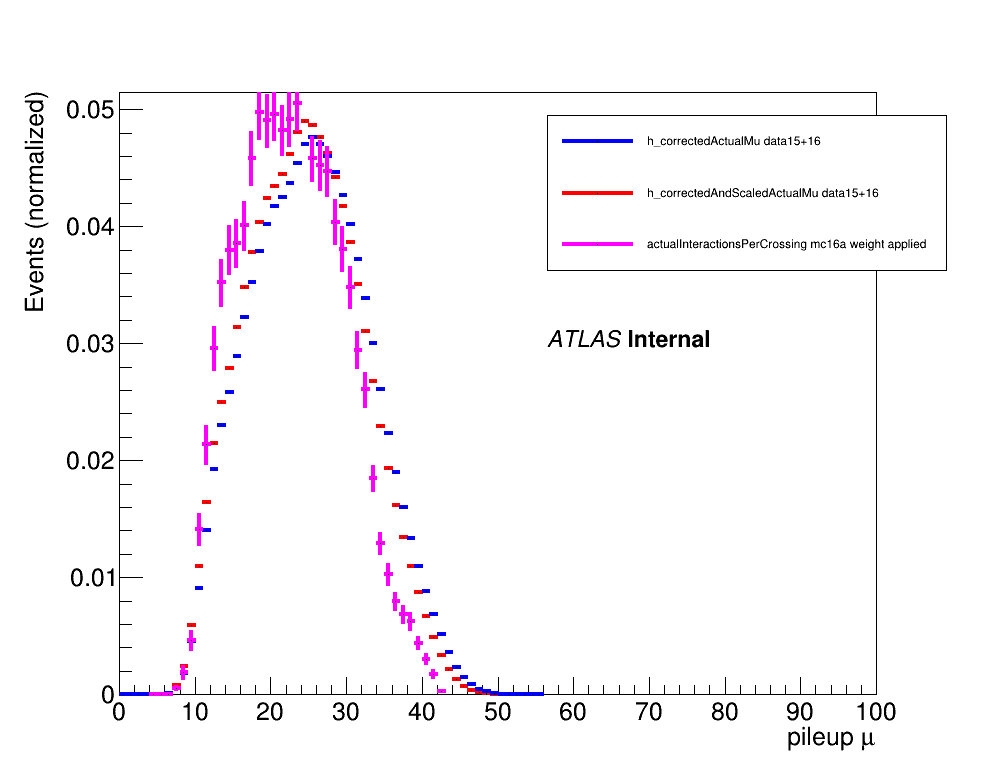

In [13]:

# set up canvas
c = ROOT.TCanvas('pileup_c', 'Pileup', 1000, 800)
c.SetMargin(0.12, 0.12, 0.1, 0.12)

mc_filename = '/data/newhouse/HNL/DHNL/user.rnewhous.mc16_13TeV.311625.DAOD_SUSY15.e7660_e5984_a875_r11915_r11748_p4357.ntuple_v3p0.v1_tree.root/user.rnewhous.23857920._000001.tree.root'
data_filename = '/home/newhouse/public/Analysis/HNL/DHNLAlgorithm/run/8_weight_test/data15-16_crossings.root'

mc_file = ROOT.TFile(mc_filename)
data_file = ROOT.TFile(data_filename, 'READ')

################ mc weighted ################
h = ROOT.TH1F('actual_mc_weighted', 'actualInteractionsPerCrossing Hist', 100,0,100)
outTree = mc_file.Get('outTree')
outTree.Draw('actualInteractionsPerCrossing>>actual_mc_weighted', 'weight_pileup', 'goff')

h.SetLineWidth(2)
h.Scale(1/h.Integral())
# yaxis = h.GetYaxis()
# yaxis.SetRangeUser(0,.7)


# h.Rebin(0)
h.Draw('same')
h.Draw('e0 same')
h.SetStats(0)
################ mc weighted ################


################ h_correctedAndScaledActualMu ################
# open file and get histogram (already stored)
h_correctedAndScaledActualMu = data_file.Get('h_correctedAndScaledActualMu')
h_correctedAndScaledActualMu.SetTitle('')

# set axis properties
# x
xaxis = h_correctedAndScaledActualMu.GetXaxis()
xaxis.SetRangeUser(0,100)
xaxis.SetTitle('pileup #mu')
# y
yaxis = h_correctedAndScaledActualMu.GetYaxis()
yaxis.SetTitle('Events (normalized)')
# set line properties
h_correctedAndScaledActualMu.Scale(1/h_correctedAndScaledActualMu.Integral())

# This draws data (h_correctedAndScaledActualMu)
h_correctedAndScaledActualMu.Draw('')
h_correctedAndScaledActualMu.Draw('e0 same')
h_correctedAndScaledActualMu.SetLineWidth(4)
h_correctedAndScaledActualMu.SetLineColor(ROOT.kRed)
################ h_correctedAndScaledActualMu ################ end


################ h_correctedActualMu ################
h_correctedActualMu = data_file.Get('h_correctedActualMu')
h_correctedActualMu.SetTitle('')

# set axis properties
# x
xaxis = h_correctedActualMu.GetXaxis()
xaxis.SetRangeUser(0,100)
xaxis.SetTitle('pileup #mu')
# y
yaxis = h_correctedActualMu.GetYaxis()
yaxis.SetTitle('Events (normalized)')
# set line properties
h_correctedActualMu.Scale(1/h_correctedActualMu.Integral())

# This draws data (h_correctedActualMu)
# 
h_correctedActualMu.Draw('same')
h_correctedActualMu.Draw('e0 same')
h_correctedActualMu.SetLineWidth(4)
h_correctedActualMu.SetLineColor(ROOT.kBlue)
################ h_correctedAndScaledActualMu ################ end


#this draws MC from the cell above but weighted with pileup weight (h)
h.Draw('same')
h.Draw('e0 same')
h.SetLineWidth(4)
h.SetLineColor(ROOT.kMagenta)

# legend
x = 0.55
y = 0.65
dy = 0.1
leg = ROOT.TLegend(x, y, x+.4, y+.2)
leg.Draw('SAME')

leg.AddEntry(h_correctedActualMu, "h_correctedActualMu data15+16")
leg.AddEntry(h_correctedAndScaledActualMu, "h_correctedAndScaledActualMu data15+16")
# leg.AddEntry(h, "actualInteractionsPerCrossing mc16e ")
leg.AddEntry(h, "actualInteractionsPerCrossing mc16a weight applied")

h_correctedAndScaledActualMu.SetStats(0)
h.SetStats(0)
atlas_label(x,y-dy, 'Internal')


c.Draw()
